In [41]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

#creating 2 columns to identify source file and if ios or android
ios_raw = pd.read_csv(root / "data" / "raw" / "ios_turns.csv", header=0)
ios_raw = ios_raw.assign(source_file="ios_turns.csv", is_ios=1)
android_raw = pd.read_csv(root / "data" / "raw" / "android_turns.csv", header=0)
android_raw = android_raw.assign(source_file="android_turns.csv", is_ios=0)

df = pd.concat([ios_raw, android_raw], ignore_index=True)
df = df[["is_ios", "source_file"] + [c for c in df.columns if c not in ["is_ios", "source_file"]]]
df.to_csv(root / "data" / "raw" / "merged_turns.csv", index=False)

In [43]:
df.shape

(62381, 36)

In [44]:
#add feature col to show if turn is from ios or android
df.columns.to_list()

['is_ios',
 'source_file',
 'init_time',
 'eventAction',
 'payloadCreation',
 'eventStart',
 'eventEnd',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventStartLatitude',
 'eventStartLongitude',
 'eventEndLatitude',
 'eventEndLongitude',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'eventSpeedChange',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'validity_mean']

In [45]:
df.head(-1)

,is_ios,source_file,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1,ios_turns.csv,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1,ios_turns.csv,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1,ios_turns.csv,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1,ios_turns.csv,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1,ios_turns.csv,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62375,0,android_turns.csv,1.708314e+08,1.0,1.0,659655.20,665527.80,4.0,14.871923,5.872625,...,1.880795,1.999884,2.212494,14.320681,15.141905,81.802050,89.523560,15.933072,23.576818,1.0
62376,0,android_turns.csv,1.708314e+08,1.0,1.0,647195.70,651362.00,5.0,9.467849,4.166313,...,1.704713,1.969830,1.969830,19.057620,21.114077,86.501810,88.805630,10.805734,9.853947,1.0
62377,0,android_turns.csv,1.708314e+08,1.0,1.0,594224.00,599541.00,4.0,14.343257,5.317000,...,1.894120,2.858092,2.896226,14.444234,16.300097,83.702620,87.314384,16.627410,21.766329,1.0
62378,0,android_turns.csv,1.708314e+08,1.0,1.0,476576.03,480980.50,5.0,28.717833,4.404469,...,1.538083,1.762072,1.793784,6.606924,7.247447,33.200780,32.208733,19.472000,109.196080,1.0


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_82287/1118046340.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


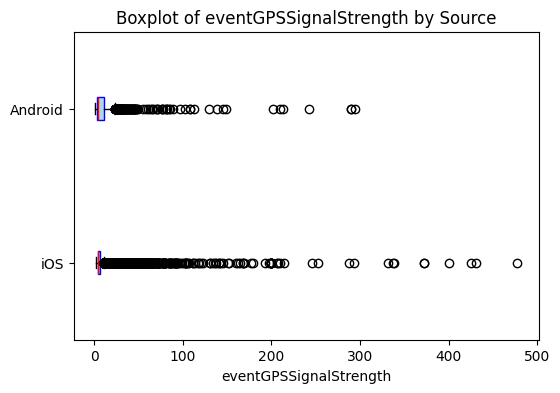

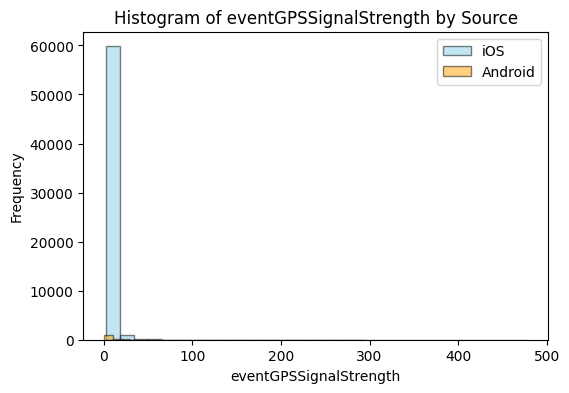

In [46]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['eventGPSSignalStrength']
android_data = df[df['is_ios'] == 0]['eventGPSSignalStrength']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()

plt.figure(figsize=(6,4))

plt.hist(ios_data, bins=30, alpha=0.5, label="iOS", color="skyblue", edgecolor="black")
plt.hist(android_data, bins=30, alpha=0.5, label="Android", color="orange", edgecolor="black")

plt.title("Histogram of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_82287/4162967592.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


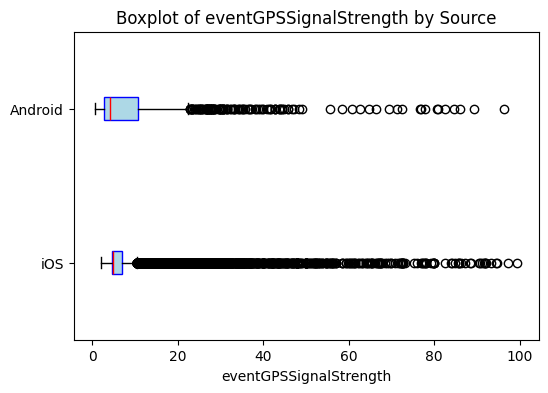

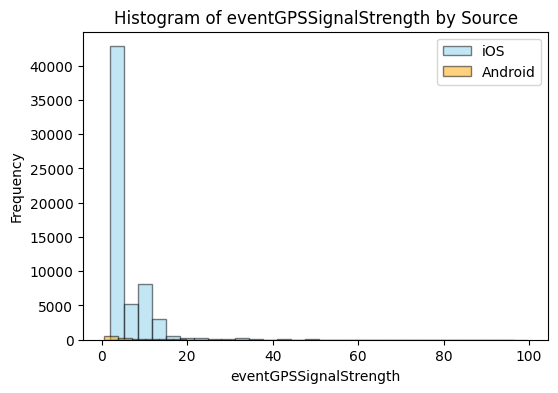

In [47]:
df = df[df['eventGPSSignalStrength'] >= 0]
df = df[df['eventGPSSignalStrength'] <= 100]
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['eventGPSSignalStrength']
android_data = df[df['is_ios'] == 0]['eventGPSSignalStrength']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()

plt.figure(figsize=(6,4))

plt.hist(ios_data, bins=30, alpha=0.5, label="iOS", color="skyblue", edgecolor="black")
plt.hist(android_data, bins=30, alpha=0.5, label="Android", color="orange", edgecolor="black")

plt.title("Histogram of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.ylabel("Frequency")
plt.legend()
plt.show() # Filter out negative values